## Q1.  Max heap

Implement a max heap instead of a min heap, by having the constructor explicitly pass the "comparison" operator in. Replace `min` and `del_min` by `dominant` and `del_dominant` methods. Change the classmethods to also take in the operator.

In [25]:
class BinaryHeap:
    def __init__(self, comparator):
        self.storage=[None]
        self.upto=0
        self.comparator = comparator
        
    @classmethod
    def heapify_slow(cls, it, comparator):
        inst = cls(comparator)
        for i in it:
            inst.insert(i)
        return inst
       
    @classmethod
    def heapify(cls, it, comparator):
        inst = cls(comparator)
        inst.storage = inst.storage + list(it)
        fromhalfway = (len(inst.storage) - 1) // 2
        inst.upto = len(inst.storage) - 1
        counter = 0
        while (fromhalfway > 0):
            # dotify(inst.storage, "onheapifyimg"+str(counter).zfill(2))
            counter += 1
            inst.sift_down(fromhalfway)
            fromhalfway -= 1
        # dotify(inst.storage, "onheapifyimg"+str(counter).zfill(2))
        return inst
        
        
    def insert(self, value):
        self.storage.append(value)
        self.upto += 1
        self.sift_up(self.upto)

    def sift_up(self, i):
        parent = i // 2
        if parent > 0 and self.comparator(self.storage[i], self.storage[parent]):
            self.storage[i], self.storage[parent] = self.storage[parent], self.storage[i]
            self.sift_up(parent)
     
    def _dominant_child(self, i):
        if 2*i + 1 > self.upto:
            return 2*i
        else:
            l = (self.storage[2*i], self.storage[2*i+1])
            if self.comparator == lt:
                return 2*i + l.index(min(l))
            elif self.comparator == gt:
                return 2*i + l.index(max(l))
    
    def sift_down(self, i):
        if 2*i <= self.upto:
            child = self._dominant_child(i)
            if self.comparator(self.storage[child], self.storage[i]):
                self.storage[child], self.storage[i] = self.storage[i], self.storage[child]
                self.sift_down(child)
        
    def dominant(self):
        return self.storage[1]
    
    def del_dominant(self):
        dom_val = self.storage[1]
        self.storage[1], self.storage[self.upto] = self.storage[self.upto], self.storage[1]
        self.storage.pop()
        self.upto -= 1
        self.sift_down(1)
        return dom_val

Lets use your code to find the minimum as well as the maximum of the old array. Run the code in the following cells and make sure you did it right...

In [50]:
data = [1,8,5,9,23,2,45,6,7,99,-5]

In [27]:
from operator import gt, lt
bh = BinaryHeap.heapify(data, lt)
print(bh.storage)
bh.dominant()

[None, -5, 1, 2, 6, 8, 5, 45, 9, 7, 99, 23]


-5

In [28]:
bh = BinaryHeap.heapify(data, gt)
print(bh.storage)
bh.dominant()

[None, 99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]


99

## Q2. Heapsort

Heapsort is an algorithm that takes the idea of the selection sort algorithm and replces the inner loop by the use of a max-heap.

In [29]:
def selection_sort(A):
    for i in range(len(A)):
        print("<<<",A)
        min_index = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]
        print(">>>",A)

In [30]:
selection_sort(data)

<<< [1, 8, 5, 9, 23, 2, 45, 6, 7, 99, -5]
>>> [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
<<< [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
>>> [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
<<< [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
<<< [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
<<< [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]


The basic idea is this. First heapify the entire array. The max should then be the 1st element (save our placeholder None) of the heap's storage. Swap this max with the last element to store the maximum at the end. Now you've put in some new wierd value at the top of the heap and have lost the heap property. You have an additional element at the end.

In-place in the array, without making any additional allocations, consider all but the last element to be the new "heap". What method in the heap class must we use to restore the heap property?

Use this method to sort the array. Print the before and after for each iteration of the outer loop as above. What is the $O(n)$ for this method?

In [53]:
def heap_sort(A):
    bh = BinaryHeap.heapify(A, gt)
    A = bh.storage[1:]
    for i in range(len(A)):
        print("<<<", A)
        A[0], A[len(A) - 1 - i] = A[len(A) - 1 - i], A[0]
        print(">>>",A)
        bh = BinaryHeap.heapify(A[0:-(i+1)], gt)
        A = bh.storage[1:] + A[-(i+1):]

In [54]:
heap_sort(data)

<<< [99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]
>>> [-5, 23, 45, 9, 8, 2, 5, 6, 7, 1, 99]
<<< [45, 23, 5, 9, 8, 2, -5, 6, 7, 1, 99]
>>> [1, 23, 5, 9, 8, 2, -5, 6, 7, 45, 99]
<<< [23, 9, 5, 7, 8, 2, -5, 6, 1, 45, 99]
>>> [1, 9, 5, 7, 8, 2, -5, 6, 23, 45, 99]
<<< [9, 8, 5, 7, 1, 2, -5, 6, 23, 45, 99]
>>> [6, 8, 5, 7, 1, 2, -5, 9, 23, 45, 99]
<<< [8, 7, 5, 6, 1, 2, -5, 9, 23, 45, 99]
>>> [-5, 7, 5, 6, 1, 2, 8, 9, 23, 45, 99]
<<< [7, 6, 5, -5, 1, 2, 8, 9, 23, 45, 99]
>>> [2, 6, 5, -5, 1, 7, 8, 9, 23, 45, 99]
<<< [6, 2, 5, -5, 1, 7, 8, 9, 23, 45, 99]
>>> [1, 2, 5, -5, 6, 7, 8, 9, 23, 45, 99]
<<< [5, 2, 1, -5, 6, 7, 8, 9, 23, 45, 99]
>>> [-5, 2, 1, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [2, -5, 1, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [1, -5, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [1, -5, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]


Time complexity is O(nlogn)


## Q3. Median maintenance

Median maintenance is a very cool algorithm to find an online median. 

We create two arrays to test our implementation, using `np.median` to compute our answer...

In [55]:
import random
import numpy as np

In [70]:
l = [random.randint(1,1000) for _ in range(150)]
print(len(l), np.median(l))
l2 = l + [random.randint(1,1000)]
print(len(l2), np.median(l2))

150 521.5
151 517.0


You will implement `def online_median(iterator)` which is a generaor yielding successive values of your online median. 

The algorithm is as follows:

We'll use 2 heaps, a max heap for the lower half of the data, and a min-heap for the upper half. We take the first 2values in our data and assign the smaller value to the max heap, while the larger value goes to the min-heap. Then, as we "insert" subsequent values in one of the two heaps, the following holds: if we keep the number of elements in both heaps equal (for the even case) or at-most differing by one, the median is respectively the average of the two dominants or the dominant in the heap with one xtra item.

What then is our strategy for this balanced insertion? Quite simple really: if a new value is not as dominant as the dominant value, add it to that heap. If it is more dominant, add it to the other. If two items in a row get added to the same heap, the heaps will be out of balance by more than one. In this case, take the dominant element from the larger heap and simply add it to the smaller one.

In [98]:
def online_median(iterator):
    val1 = iterator.__next__()
    val2 = iterator.__next__()
    if val1 < val2:
        max_heap = BinaryHeap.heapify([val1], gt)
        min_heap = BinaryHeap.heapify([val2], lt)
    else:
        max_heap = BinaryHeap.heapify([val2], gt)
        min_heap = BinaryHeap.heapify([val1], lt)
    
    next_val = iterator.__next__()
    flag_max = 0
    flag_min = 0
    while(next_val): 
        if next_val < min_heap.dominant():
            max_heap.insert(next_val)
            flag_max += 1
            flag_min = 0
        else: 
            min_heap.insert(next_val)
            flag_min += 1
            flag_max = 0
        
        if flag_max > 1:
            min_heap.insert(max_heap.dominant())
            max_heap.del_dominant()
            flag_max = 0
        elif flag_min > 1:
            max_heap.insert(min_heap.dominant())
            min_heap.del_dominant()
            flag_min = 0
        
        if len(max_heap.storage) == len(min_heap.storage):
            yield (max_heap.dominant() + min_heap.dominant())/2
        elif len(max_heap.storage) > len(min_heap.storage):
            yield max_heap.dominant()
        else:
            yield min_heap.dominant()
        
        try:
            next_val = iterator.__next__()
        except:
            break
    
#     if len(max_heap.storage) == len(min_heap.storage):
#         yield (max_heap.dominant() + min_heap.dominant())/2
#     elif len(max_heap.storage) > len(min_heap.storage):
#         yield max_heap.dominant()
#     else:
#         yield min_heap.dominant()

Do your answers match?

538


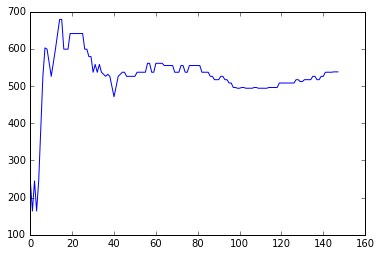

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
medians = list(online_median(iter(l)))
print(medians[-1])
plt.plot(medians)

In [102]:
list(online_median(iter(l2)))[-1]

538

What is the $O(n)$ behavior of this median maintenance algorithm?

O(nlogn)

Lastly, lets repeat the analysis we did last time on the randomly generated data.

In [95]:
from random import normalvariate, random
from itertools import count
def make_data(m, stop=None):
    for _ in count():
        if stop and _ > stop:
            break
        yield 1.0e09 + normalvariate(0, m*random() )

In [96]:
g = online_median(make_data(5, 100))
print(type(g))
out = list(g)
out[-10:]

<class 'generator'>


[1000000000.0854486,
 1000000000.0854486,
 1000000000.0854486,
 1000000000.0854486,
 1000000000.1107265,
 1000000000.1107265,
 1000000000.1107265,
 1000000000.1107265,
 1000000000.1107265,
 1000000000.1107265]

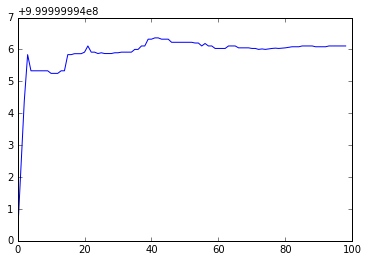

In [97]:
plt.plot(out)